# Integrated Assessment
Modules: Machine Learning for Business 

Student: Danton Prestes - sbs23086

# Question 1

Discuss the concept and application of Time series analysis using machine learning modelling by providing a real-world data set. 

What is the purpose of The Augmented Dickey-Fuller test in time series?

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. 

It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series. The ARIMA model mostly fit on the stationary dataset so we check the dataset is stationary or not by using the Dickey-Fuller Test.


a) Apply an appropriate Box-Jenkins model to the chosen dataset (ARMA, ARIMA, SARIMA etc). 
Check for the model adequacy.


In [ ]:
##pip install --upgrade statsmodels pandas
##pip install scikit-learn


In [7]:
## Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.simplefilter("ignore")

/Users/dan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ImportError: cannot import name 'METRIC_MAPPING64' from 'sklearn.metrics._dist_metrics' (/Users/dan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_dist_metrics.cpython-39-darwin.so)

In [8]:
## Import dataset
df=pd.read_csv('jewelry.csv')
df.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


### EDA - Exploratory Data Analysis

In [9]:
df.tail()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
95905,2021-12-01 09:47:37 UTC,2719016587653808559,1515966223597820877,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN
95906,2021-12-01 09:50:37 UTC,2719018098886705639,1956663830729720074,1,1.806829e+18,NaN,0.000000e+00,229.99,1.515916e+18,NaN,red,gold,NaN
95907,2021-12-01 09:52:06 UTC,2719018846999544322,1956663848219968336,1,1.806829e+18,jewelry.earring,1.000000e+00,630.00,1.515916e+18,f,white,gold,diamond
95908,2021-12-01 09:55:35 UTC,2719020596963836492,1835566854106513435,1,1.806829e+18,jewelry.earring,0.000000e+00,83.42,1.515916e+18,NaN,white,gold,fianit
95909,2021-12-01 09:59:07 UTC,2719022379232658075,1956663846156370429,1,1.806829e+18,jewelry.pendant,1.000000e+00,97.12,1.515916e+18,NaN,red,gold,NaN


In [10]:
df.isnull().sum()

2018-12-01 11:40:29 UTC        0
1924719191579951782            0
1842195256808833386            0
1                              0
1806829201890738522         5352
jewelry.earring             9933
0                           4785
561.51                      5352
1515915625207851155         5352
Unnamed: 9                 48167
red                         7660
gold                        5462
diamond                    34058
dtype: int64

In [11]:
# Checking dataset dimension
df.shape

(95910, 13)

In [12]:
# check dataset column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2018-12-01 11:40:29 UTC  95910 non-null  object 
 1   1924719191579951782      95910 non-null  int64  
 2   1842195256808833386      95910 non-null  int64  
 3   1                        95910 non-null  int64  
 4   1806829201890738522      90558 non-null  float64
 5   jewelry.earring          85977 non-null  object 
 6   0                        91125 non-null  float64
 7   561.51                   90558 non-null  float64
 8   1515915625207851155      90558 non-null  float64
 9   Unnamed: 9               47743 non-null  object 
 10  red                      88250 non-null  object 
 11  gold                     90448 non-null  object 
 12  diamond                  61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [13]:
df.head()
#no columns, add columns
columns = ['order_date','order_id','user_id','purchase','category_id','category','brand','price','price_id','buyer','colour1','colour2','type']
df.columns = columns

In [14]:
df.head()

,order_date,order_id,user_id,purchase,category_id,category,brand,price,price_id,buyer,colour1,colour2,type
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [15]:
#Checking for null values in columns

df.isnull().sum()

order_date         0
order_id           0
user_id            0
purchase           0
category_id     5352
category        9933
brand           4785
price           5352
price_id        5352
buyer          48167
colour1         7660
colour2         5462
type           34058
dtype: int64

In [16]:
#dropping columns not needed
df.drop(columns=['order_id','category_id','price_id','colour1','colour2'],inplace=True)

In [17]:
#try to identify unique entries - check how many unique customers, brands and orders id are there.
#need to compare order id's to customers to check whether same customer placed more than 1 order (improvement)

unique_entries_dataframe = df.apply(lambda x: x.unique())


In [18]:
print(unique_entries_dataframe)

order_date    [2018-12-01 17:38:31 UTC, 2018-12-02 13:53:42 ...
user_id       [1806829193678291446, 1842214461889315556, 183...
purchase                                                    [1]
category      [nan, jewelry.pendant, jewelry.necklace, jewel...
brand         [nan, 1.0, 0.0, 2.0, 4.0, 6.0, 5.0, 3.0, 1.550...
price         [212.14, 54.66, 88.9, 417.67, 102.27, 150.55, ...
buyer                                               [nan, f, m]
type          [nan, sapphire, diamond, amethyst, fianit, pea...
dtype: object


In [19]:
df['price'].fillna(df['price'].mean(), inplace=True)

In [20]:
df.head()

,order_date,user_id,purchase,category,brand,price,buyer,type
0,2018-12-01 17:38:31 UTC,1806829193678291446,1,NaN,NaN,212.14,NaN,NaN
1,2018-12-02 13:53:42 UTC,1842214461889315556,1,jewelry.pendant,1.0,54.66,f,sapphire
2,2018-12-02 17:44:02 UTC,1835566849434059453,1,jewelry.pendant,0.0,88.90,f,diamond
3,2018-12-02 21:30:19 UTC,1873936840742928865,1,jewelry.necklace,0.0,417.67,NaN,amethyst
4,2018-12-02 22:09:34 UTC,1835566854827934449,1,jewelry.earring,1.0,102.27,NaN,NaN


In [21]:
## treating date format on dataset to use as index, so we convert this in date format
from datetime import datetime, timedelta, timezone

df['order_date'] = pd.to_datetime(df['order_date'])

# Split timezone from datetime
df['order_date'] = df['order_date'].dt.tz_localize(None)

# Print the modified DataFrame
print(df.order_date)


0       2018-12-01 17:38:31
1       2018-12-02 13:53:42
2       2018-12-02 17:44:02
3       2018-12-02 21:30:19
4       2018-12-02 22:09:34
                ...        
95905   2021-12-01 09:47:37
95906   2021-12-01 09:50:37
95907   2021-12-01 09:52:06
95908   2021-12-01 09:55:35
95909   2021-12-01 09:59:07
Name: order_date, Length: 95910, dtype: datetime64[ns]


In [22]:
##set date column as index
df=df.set_index('order_date')
df.head()

,user_id,purchase,category,brand,price,buyer,type
order_date,,,,,,,
2018-12-01 17:38:31,1806829193678291446,1,NaN,NaN,212.14,NaN,NaN
2018-12-02 13:53:42,1842214461889315556,1,jewelry.pendant,1.0,54.66,f,sapphire
2018-12-02 17:44:02,1835566849434059453,1,jewelry.pendant,0.0,88.90,f,diamond
2018-12-02 21:30:19,1873936840742928865,1,jewelry.necklace,0.0,417.67,NaN,amethyst
2018-12-02 22:09:34,1835566854827934449,1,jewelry.earring,1.0,102.27,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95910 entries, 2018-12-01 17:38:31 to 2021-12-01 09:59:07
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   95910 non-null  int64  
 1   purchase  95910 non-null  int64  
 2   category  85977 non-null  object 
 3   brand     91125 non-null  float64
 4   price     95910 non-null  float64
 5   buyer     47743 non-null  object 
 6   type      61852 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.9+ MB


**a)** Apply an appropriate Box-Jenkins model to the chosen dataset (ARMA, ARIMA, SARIMA, etc). Check for model adequacy. 

# ARIMA

### Analysis on price attribute

In [24]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model_ARIMA=ARIMA(df['price'],order=(1,0,2))

/Users/dan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                95910
Model:                 ARIMA(1, 0, 2)   Log Likelihood             -717282.499
Date:                Thu, 30 Nov 2023   AIC                        1434574.998
Time:                        22:02:49   BIC                        1434622.354
Sample:                             0   HQIC                       1434589.397
                              - 95910                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        362.2125     10.185     35.564      0.000     342.250     382.175
ar.L1          0.9997      0.000   9576.014      0.000       0.999       1.000
ma.L1         -0.9053      0.001   -934.625      0.000      -0.907      -0.903
ma.L2         -0.0928      0.001    -93.498      0.000      -0.095      -0.091
sigma2      1.834e+05     44.581   4114.273      0.000    1.83e+05    1.84e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):        5299852797.67
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                            19.85
Prob(H) (two-sided):                  0.00   Kurtosis:                      1153.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
##prediction
pred_start_date=df.index[0]
pred_end_date=df.index[-1]
print(pred_start_date)
print(pred_end_date)

2018-12-01 17:38:31
2021-12-01 09:59:07


In [27]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=df['price']-pred

In [28]:
pred

order_date
2018-12-01 17:38:31    362.212513
2018-12-02 13:53:42    347.599752
2018-12-02 17:44:02    332.717633
2018-12-02 21:30:19    335.977572
2018-12-02 22:09:34    366.514163
                          ...    
2021-12-01 09:47:37    393.930587
2021-12-01 09:50:37    416.561185
2021-12-01 09:52:06    401.869072
2021-12-01 09:55:35    440.706357
2021-12-01 09:59:07    385.779613
Name: predicted_mean, Length: 95910, dtype: float64

In [29]:
residuals

order_date
2018-12-01 17:38:31   -150.072513
2018-12-02 13:53:42   -292.939752
2018-12-02 17:44:02   -243.817633
2018-12-02 21:30:19     81.692428
2018-12-02 22:09:34   -264.244163
                          ...    
2021-12-01 09:47:37    -31.717571
2021-12-01 09:50:37   -186.571185
2021-12-01 09:52:06    228.130928
2021-12-01 09:55:35   -357.286357
2021-12-01 09:59:07   -288.659613
Length: 95910, dtype: float64

In [ ]:
To check model adequacy, we can use AIC + Residual analysis

In [37]:
#  Calculate AIC
aic_value = model_Arima_fit.aic
print("AIC:", aic_value)


AIC: 1434574.9981466765


**OBSERVATION** The value of AIC for the model is high. It means that model does not fit the data so well. 

<AxesSubplot:>

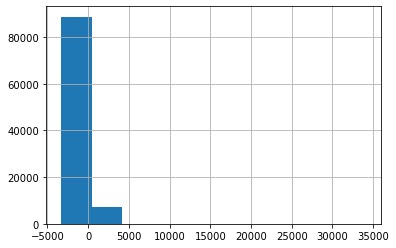

In [39]:
# Residual analysis for an ARIMA model
residuals = model_Arima_fit.resid

# Plot histogram of residuals
residuals.hist()


**b)** Make one-step-ahead forecasts of the last 10 observations. Determine the forecast errors.

In [30]:
pred=model_Arima_fit.predict(start='2018-12-01 17:38:31',end='2021-12-01 09:59:07')
residuals=df['price'].unique()[-10]-pred

In [31]:
pred

order_date
2018-12-01 17:38:31    362.212513
2018-12-02 13:53:42    347.599752
2018-12-02 17:44:02    332.717633
2018-12-02 21:30:19    335.977572
2018-12-02 22:09:34    366.514163
                          ...    
2021-12-01 09:47:37    393.930587
2021-12-01 09:50:37    416.561185
2021-12-01 09:52:06    401.869072
2021-12-01 09:55:35    440.706357
2021-12-01 09:59:07    385.779613
Name: predicted_mean, Length: 95910, dtype: float64

<AxesSubplot:>

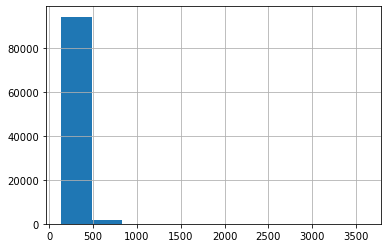

In [32]:
pred.hist()

In [41]:
residuals

order_date
2018-12-01 17:38:31   -150.072513
2018-12-02 13:53:42   -292.939752
2018-12-02 17:44:02   -243.817633
2018-12-02 21:30:19     81.692428
2018-12-02 22:09:34   -264.244163
                          ...    
2021-12-01 09:47:37    -31.717571
2021-12-01 09:50:37   -186.571185
2021-12-01 09:52:06    228.130928
2021-12-01 09:55:35   -357.286357
2021-12-01 09:59:07   -288.659613
Length: 95910, dtype: float64

<AxesSubplot:>

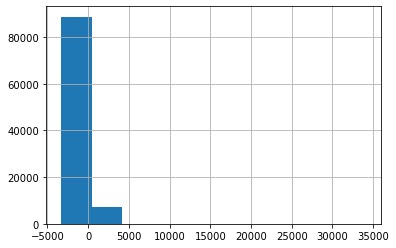

In [42]:
residuals.hist()

In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
_, p_value = shapiro(residuals)

# Check p-value
if p_value < 0.05:
    print("The residuals are not normally distributed.")
else:
    print("The residuals appear to be normally distributed.")


**C)** Make a time series plot of the data, and further calculate and illustrate the sample autocorrelation and partial autocorrelation (PA). Is there significant autocorrelation in the chosen time series?

In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

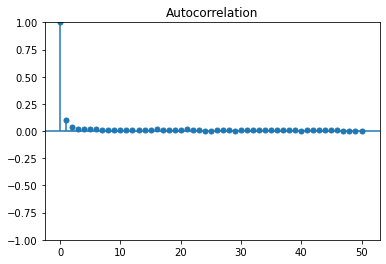

In [44]:
acf = plot_acf(df["price"].dropna())

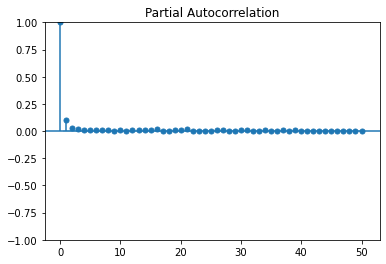

In [45]:
pacf = plot_pacf(df["price"].dropna())

**ACF:** Direct and indirect effect of values in previous time lags. In the graph we can see the strongest correlation at early points of the time series and the following lags are stabilized with weak correlation between lags (but not negative). 

**PACF**: Plot shows the most common scenarion for PACF which is a significant spike on the initial lags and drops to zero on subsequent lags. 

Despite Autocorrelation has a high correlation between the lags, 
I think this indicate overfit.

Plotting Partial AutoCorrelation

## Analysis using price attribute

In [ ]:
# This ACF (Autocorrelation function) defines how data points
#in time series are related on average to the preceding data points

plot_acf(df['price'])

Count the number of significant likes. 
Autocorrelation is the measure of each observation is correlated 
to the previous observation. 

In [ ]:
plot_pacf(df["price"], method='ywm')

By reviewing the autocorrelation above, we can see that there
is no significant(strong) likes of correlation between obs(t) and t-1,
t-2 and so on. 


Notes from class:
ACF - Exponential decay => no MA (q=0)

PACF - Significant value at lag 1 ie p=1

Running Akaike to evaluate model performance.

In [ ]:
aicVals = []
for p in range(5):
    for q in range(5):
        aicVals.append( [   sm.ARIMA( df["price"], order=(p, 0, q) ).fit().aic, p, q   ] )

In [ ]:
plotPerColumnDistribution(df, 10, 5)

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
plotCorrelationMatrix(df, 2)